In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(subset=['Description'], inplace=True)
df['CustomerID'].fillna(-1, inplace=True)

# Handling negative values in Quantity and UnitPrice
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0]

In [ ]:
# Analyze top products and countries
top_products = df['Description'].value_counts().head(10)
top_countries = df['Country'].value_counts().head(10)

print(f'\n top 10 prod:\n{top_products}')
print(f'\n top 10 countris:\n{top_countries}')


 top 10 prod:
WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

 top 10 countris:
United Kingdom    485692
Germany             9042
France              8408
EIRE                7894
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Name: Country, dtype: int64


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530691 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530691 non-null  object        
 1   StockCode    530691 non-null  object        
 2   Description  530691 non-null  object        
 3   Quantity     530691 non-null  int64         
 4   InvoiceDate  530691 non-null  datetime64[ns]
 5   UnitPrice    530691 non-null  float64       
 6   CustomerID   530691 non-null  float64       
 7   Country      530691 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Customer-wise Analysis
total_customers = df['CustomerID'].nunique()
products_per_customer = df.groupby('CustomerID')['StockCode'].nunique()
total_quantity_value_per_customer = df.groupby('CustomerID').agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

print("Total Number of Customers:", total_customers)
print(products_per_customer)
print(total_quantity_value_per_customer)

Total Number of Customers: 4340
CustomerID
-1.0        3426
 12346.0       1
 12347.0     103
 12348.0      22
 12349.0      73
            ... 
 18280.0      10
 18281.0       7
 18282.0      12
 18283.0     263
 18287.0      59
Name: StockCode, Length: 4340, dtype: int64
            Quantity  UnitPrice
CustomerID                     
-1.0          446736  831447.16
 12346.0       74215       1.04
 12347.0        2458     481.21
 12348.0        2341     178.71
 12349.0         631     605.10
...              ...        ...
 18280.0          45      47.65
 18281.0          54      39.36
 18282.0         103      62.39
 18283.0        1397    1220.93
 18287.0        1586     104.55

[4340 rows x 2 columns]


<ipython-input-47-936cf4c61210>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_per_customer.head(10).index, y=products_per_customer.head(10).values, palette='viridis')


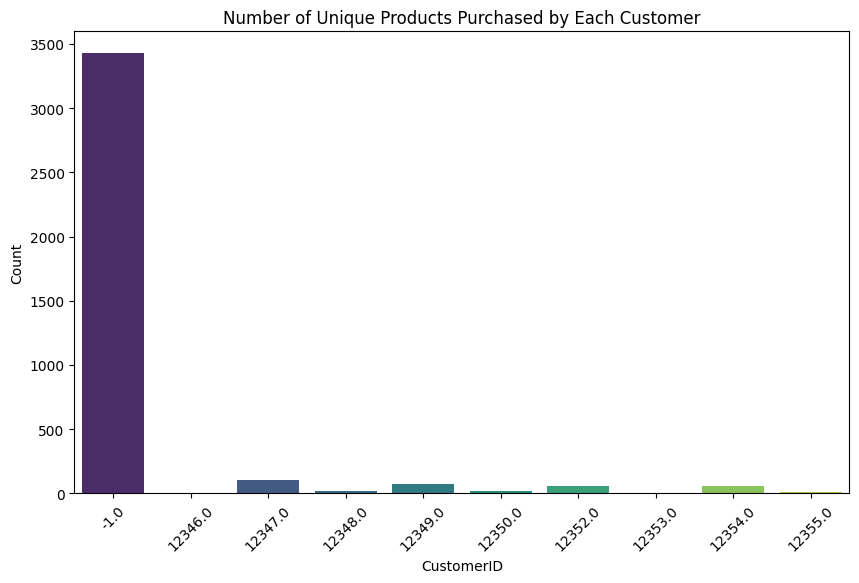

In [ ]:
# Number of Unique Products Purchased by Each Customer
plt.figure(figsize=(10, 6))
sns.barplot(x=products_per_customer.head(10).index, y=products_per_customer.head(10).values, palette='viridis')
plt.title('Number of Unique Products Purchased by Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-48-9975f8e1a359>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_quantity_value_per_customer.head(10).index, y=total_quantity_value_per_customer['Quantity'].head(10).values, palette='viridis')
<ipython-input-48-9975f8e1a359>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_quantity_value_per_customer.head(10).index, y=total_quantity_value_per_customer['UnitPrice'].head(10).values, palette='viridis')


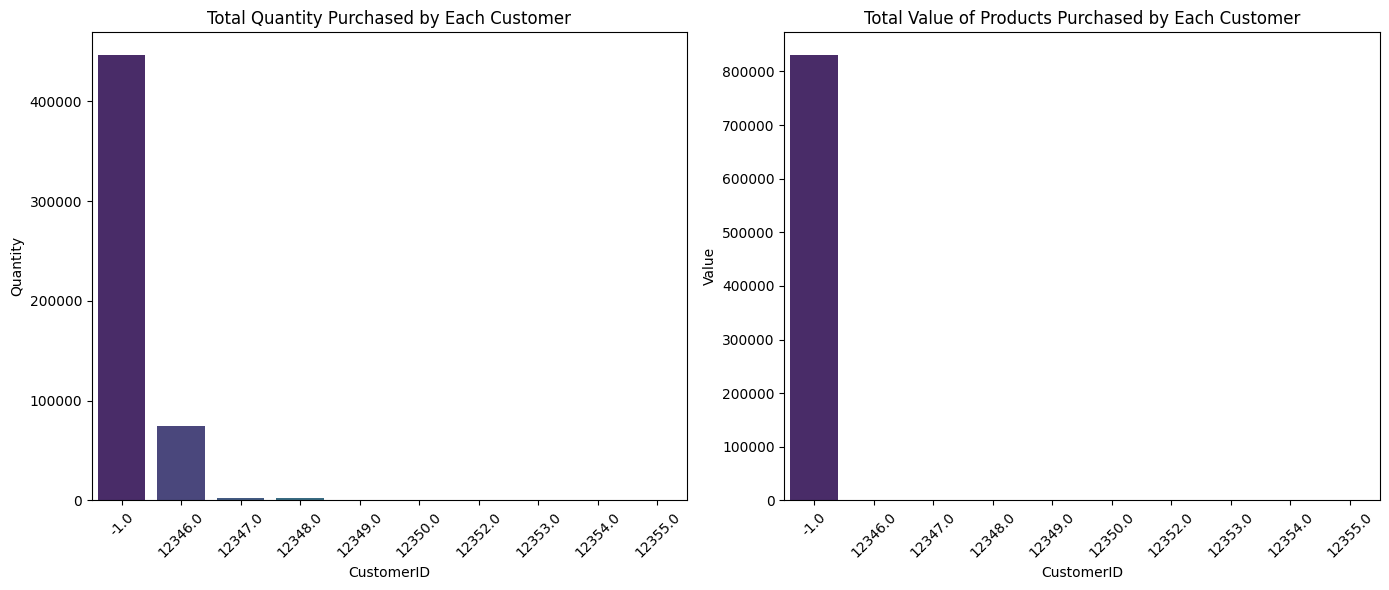

In [ ]:
# Visualize Total Quantity and Value of Products Purchased by Each Customer
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=total_quantity_value_per_customer.head(10).index, y=total_quantity_value_per_customer['Quantity'].head(10).values, palette='viridis')
plt.title('Total Quantity Purchased by Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(x=total_quantity_value_per_customer.head(10).index, y=total_quantity_value_per_customer['UnitPrice'].head(10).values, palette='viridis')
plt.title('Total Value of Products Purchased by Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

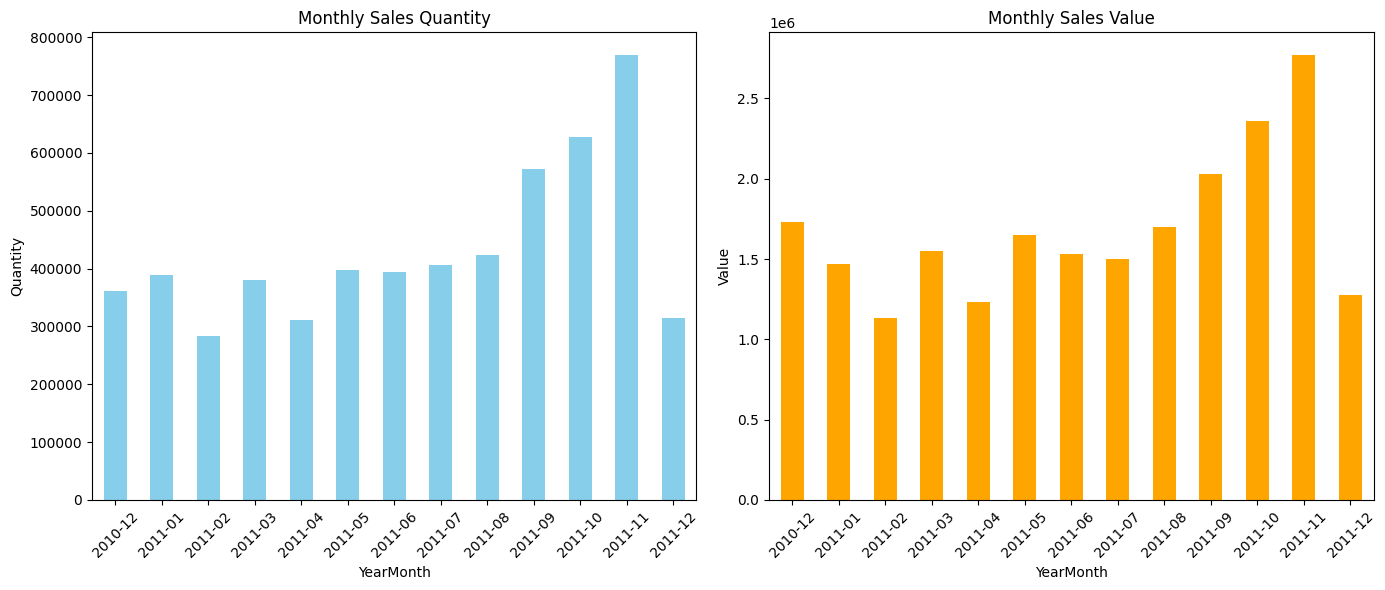

In [ ]:
# Visualize Monthly Trends
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
monthly_sales_quantity.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Quantity')
plt.xlabel('YearMonth')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
monthly_sales_value.plot(kind='bar', color='orange')
plt.title('Monthly Sales Value')
plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



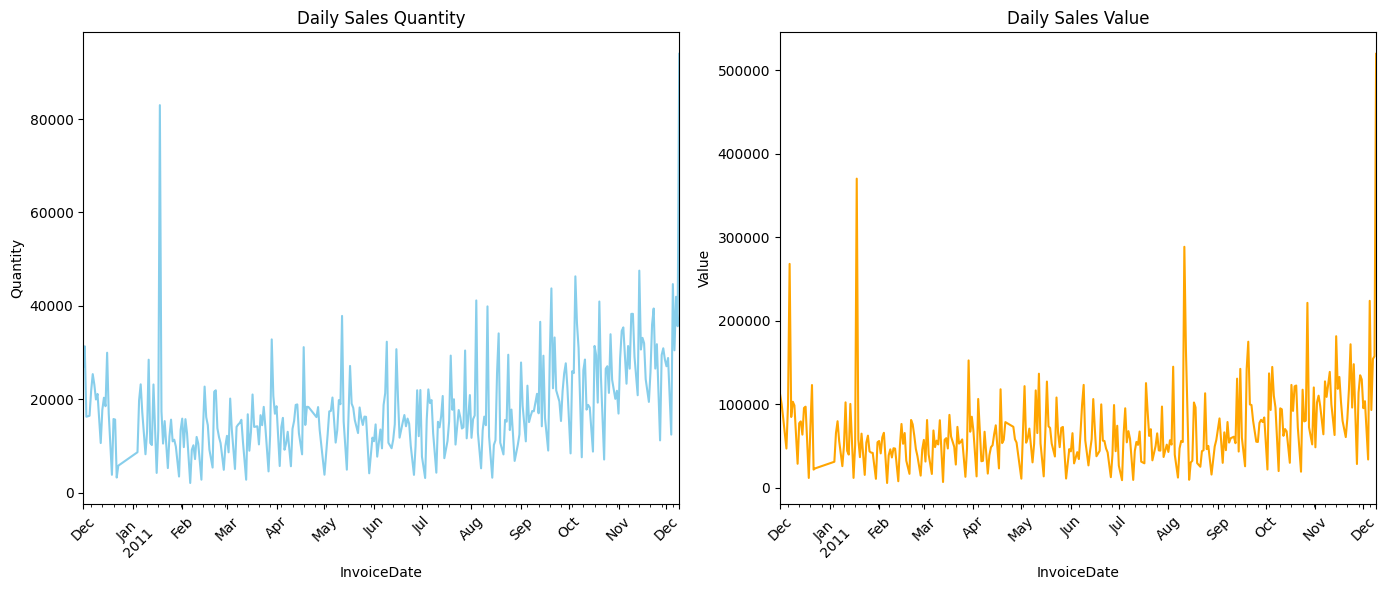


Busiest Month: 2011-11
Busiest Day: 2011-12-09


In [ ]:
# Daily Trends
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
daily_sales_quantity.plot(kind='line', color='skyblue')
plt.title('Daily Sales Quantity')
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
daily_sales_value.plot(kind='line', color='orange')
plt.title('Daily Sales Value')
plt.xlabel('InvoiceDate')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Busiest days and months
busiest_month = monthly_sales_quantity.idxmax()
busiest_day = daily_sales_quantity.idxmax()

print("\nBusiest Month:", busiest_month)
print("Busiest Day:", busiest_day)

# Product-wise Analysis
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_value = df.groupby('Description').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).sort_values(by='Quantity', ascending=False).head(10)


<ipython-input-52-2d950ac17de9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_quantity.index, y=top_products_quantity.values, palette='viridis')


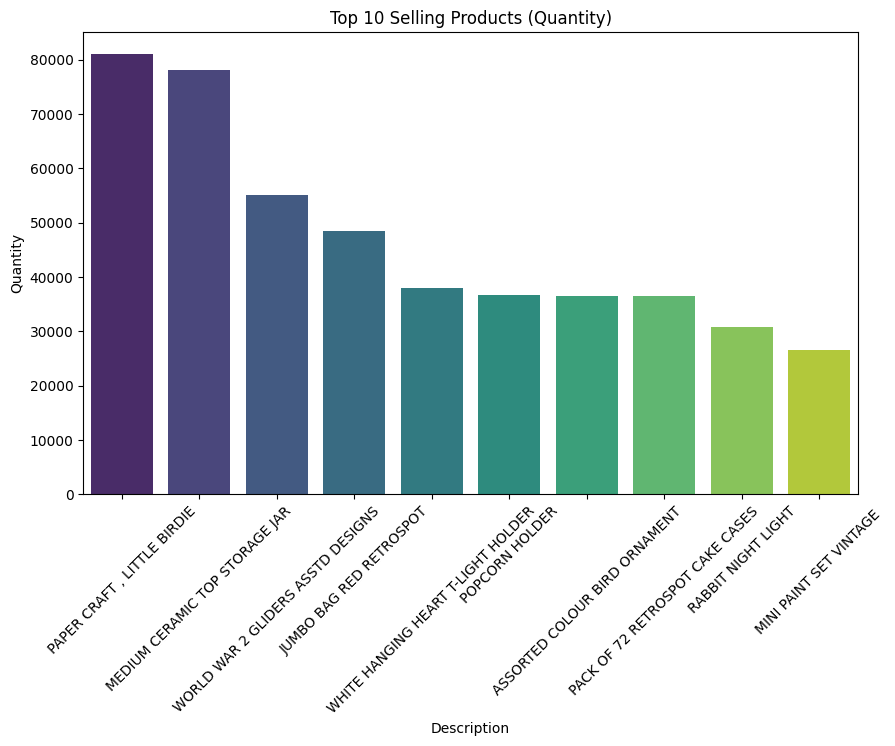

<ipython-input-52-2d950ac17de9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_value.index, y=top_products_value['Quantity'].values, palette='viridis')


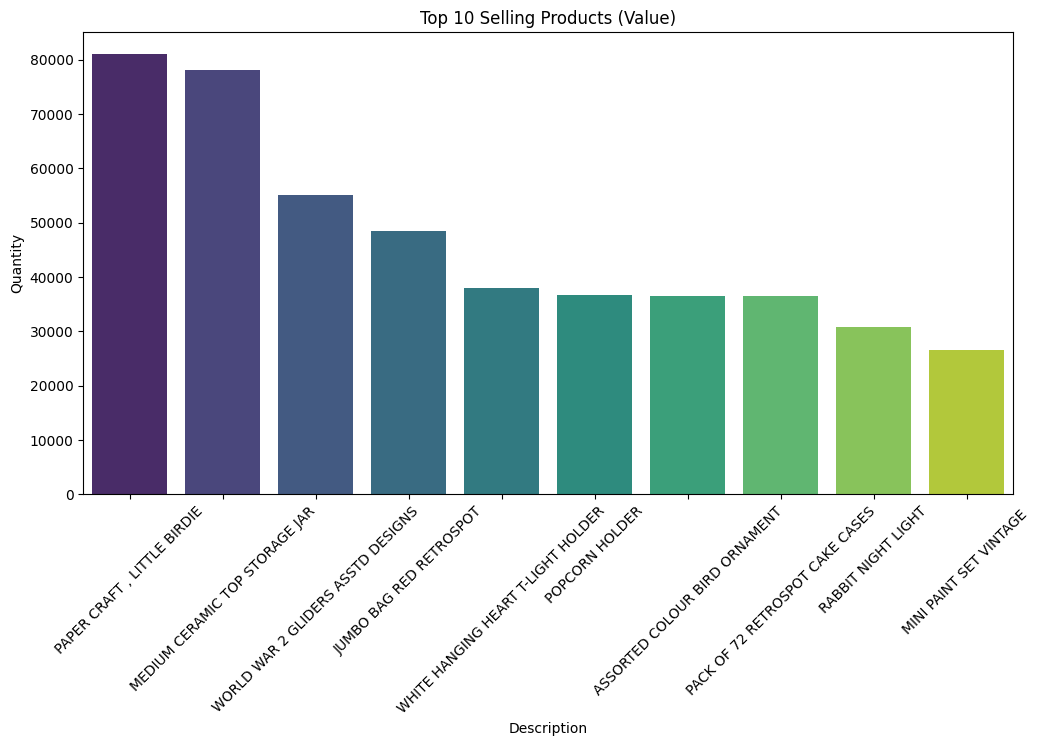

In [ ]:
# Top 10 Selling Products (Quantity)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_quantity.index, y=top_products_quantity.values, palette='viridis')
plt.title('Top 10 Selling Products (Quantity)')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

# Top 10 Selling Products (Value)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_value.index, y=top_products_value['Quantity'].values, palette='viridis')
plt.title('Top 10 Selling Products (Value)')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Create a DataFrame for RFM analysis
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': 'max',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

In [ ]:
rfm_df['Recency'] = (df['InvoiceDate'].max() - rfm_df['InvoiceDate']).dt.days
rfm_df.rename(columns={'Quantity': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)
rfm_df = rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df.iloc[:, 1:])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Analyze cluster summary
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).reset_index()



<ipython-input-57-761e068d4ad8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Recency'], palette='viridis')
<ipython-input-57-761e068d4ad8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Frequency'], palette='viridis')
<ipython-input-57-761e068d4ad8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Monetary'], palette='viridis')


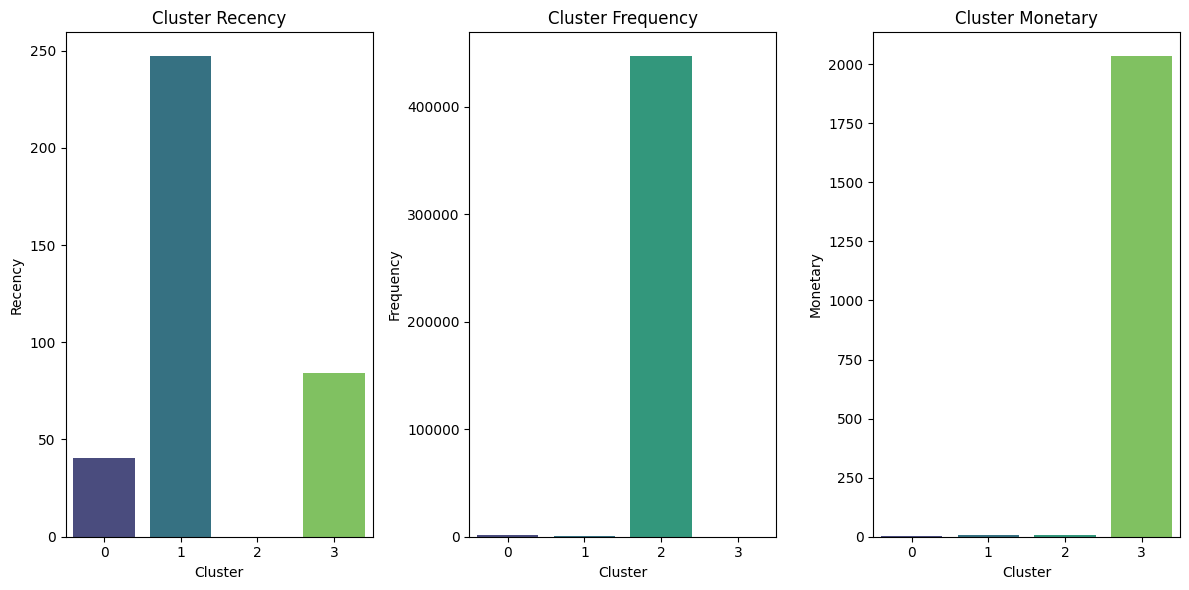

In [ ]:
# Visualize Cluster Summary
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Recency'], palette='viridis')
plt.title('Cluster Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.subplot(1, 3, 2)
sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Frequency'], palette='viridis')
plt.title('Cluster Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.barplot(x=cluster_summary['Cluster'], y=cluster_summary['Monetary'], palette='viridis')
plt.title('Cluster Monetary')
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.tight_layout()
plt.show()



In [ ]:
# final cluster summary
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
   Cluster     Recency      Frequency     Monetary
0        0   40.409495    1468.564778     3.574282
1        1  247.042870     360.513514     5.285758
2        2    0.000000  446736.000000     6.262453
3        3   84.000000       1.000000  2033.100000
